<a href="https://colab.research.google.com/github/virsalee27/UAS_PCD/blob/main/braintumor_fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kode untuk memanggil dataset dari Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


  Kode di atas intinya buat ngejalanin deep learning pake CNN (Convolutional Neural Network) dengan arsitektur VGG16 buat klasifikasi gambar. Pertama, import library penting kayak numpy buat ngolah data, matplotlib & seaborn buat visualisasi, dan tensorflow.keras buat bikin model AI. Lalu, ada ImageDataGenerator buat augmentasi gambar biar model lebih kuat, VGG16 sebagai model pre-trained, dan beberapa layer kayak Dense, Flatten, & Dropout buat nambahin bagian klasifikasi di atas VGG16. Terakhir, ada classification_report & confusion_matrix buat ngecek performa model setelah training, biar bisa lihat akurasi dan kesalahan prediksinya

# Instal dan Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import classification_report, confusion_matrix


# Instal Tenserflow

In [ ]:
!pip install tensorflow


# Load Dataset dan Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Pastikan ini ada

# Preprocessing data menggunakan ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30,
                                   width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True,
                                   validation_split=0.2)  # 80% Train - 20% Validation


Kode di atas digunakan buat preprocessing gambar sebelum dimasukin ke model deep learning. ImageDataGenerator di sini bertugas buat augmentasi data biar model lebih kuat dan gak gampang overfitting. Tiap gambar bakal dinormalisasi (rescale=1./255) biar pixelnya ada di rentang 0-1 (bukan 0-255). Terus ada efek rotasi (30°), geser kanan-kiri/atas-bawah (20%), zoom-in/out (20%), shearing (distorsi), dan flipping horizontal, supaya model bisa belajar dari berbagai variasi gambar. Dataset juga otomatis dibagi 80% buat training & 20% buat validasi pake validation_split=0.2. Intinya, ini trik buat bikin dataset lebih variatif tanpa harus nambah data baru!

# Membangun Model CNN dengan VGG16

In [ ]:
# Path ke dataset (pastikan sudah diupload ke Google Colab)
dataset_path = "/content/drive/MyDrive/tugasPCD/brain_tumor_dataset"

# Preprocessing menggunakan ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalisasi pixel
    rotation_range=20,      # Rotasi untuk augmentasi
    width_shift_range=0.2,  # Pergeseran lebar
    height_shift_range=0.2, # Pergeseran tinggi
    shear_range=0.2,        # Distorsi bentuk
    zoom_range=0.2,         # Zoom in/out
    horizontal_flip=True,   # Flip horizontal
    validation_split=0.2    # Split data 80% train, 20% validasi
)

# Load Data Training dan Validasi
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224), # Sesuai dengan input model VGG16/ResNet50
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


Kode ini digunakan buat loading dataset gambar MRI tumor otak yang sudah di-upload ke Google Drive. dataset_path adalah alamat folder dataset yang berisi gambar tumor dan non-tumor. Data diolah pakai ImageDataGenerator, yang menormalisasi pixel (0-1) dan augmentasi gambar (rotasi, geser, zoom, dll.) biar model gak gampang overfitting. Lalu, dataset dibagi 80% buat training & 20% buat validasi (validation_split=0.2).

Selanjutnya, train_generator dan validation_generator mengambil gambar dari folder, lalu mengubah ukuran gambar jadi 224x224 pixel (standar buat VGG16/ResNet50), dan mengatur batch size jadi 32. class_mode='binary' dipakai karena ini adalah klasifikasi biner (Tumor vs Normal). Intinya, ini bagian yang nyiapin data biar siap masuk ke model deep learning!

# Import Library yang diperlukan untuk Instal model VGG16

In [ ]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16, ResNet50  # ✅ PASTIKAN VGG16 dan ResNet50 diimpor
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import os


# Membangun Model CNN dengan VGG16

In [ ]:
# Load model VGG16 tanpa top layer (fully connected layers)
base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Menambahkan lapisan baru untuk klasifikasi
x = Flatten()(base_model_vgg.output)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Output biner (Tumor/Normal)

# Model final
model_vgg = Model(inputs=base_model_vgg.input, outputs=x)

# Freeze layer awal agar hanya bagian klasifikasi yang dilatih
for layer in base_model_vgg.layers:
    layer.trainable = False

# Compile model
model_vgg.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Training model
history_vgg = model_vgg.fit(train_generator, validation_data=validation_generator, epochs=10)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 189s 25s/step - accuracy: 0.5913 - loss: 0.7253 - val_accuracy: 0.7600 - val_loss: 0.5791
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 165s 21s/step - accuracy: 0.6458 - loss: 0.6195 - val_accuracy: 0.7200 - val_loss: 0.5505
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 147s 21s/step - accuracy: 0.7252 - loss: 0.5533 - val_accuracy: 0.6600 - val_loss: 0.5890
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 171s 25s/step - accuracy: 0.7340 - loss: 0.5326 - val_accuracy: 0.7000 - val_loss: 0.5140
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 190s 23s/step - accuracy: 0.7804 - loss: 0.5004 - val_accuracy: 0.8000 - val_loss: 0.4700
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 191s 21s/step - accuracy: 0.7608 - loss: 0.4585 - val_accuracy: 0.7600 - val_loss: 0.4692
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 154s 22s/step - accuracy: 0.8515 - loss: 0.3973 - val_accuracy: 0.8000 - val_loss: 0.4669
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 145s 21s/step - accuracy: 0.7274 - loss: 0.5067 - val_accuracy: 0.7000 - val_loss: 0.5438
Epo

Kode diatat membangun model deep learning berbasis VGG16 untuk mendeteksi tumor otak dari gambar MRI. Pertama, model VGG16 dimuat tanpa bagian akhir (include_top=False), jadi hanya menggunakan bagian feature extractor yang sudah dilatih sebelumnya di dataset ImageNet. Kemudian, ditambahkan layer baru untuk klasifikasi, yaitu Flatten() untuk mengubah fitur jadi vektor 1D, Dense(128, activation='relu') untuk menambah lapisan fully connected, dan Dense(1, activation='sigmoid') sebagai output biner (Tumor/Normal). Semua layer awal VGG16 dibekukan (freeze) agar tidak ikut dilatih ulang, sehingga hanya lapisan tambahan yang belajar dari dataset baru. Model ini dikompilasi menggunakan Adam optimizer dan binary_crossentropy sebagai loss function, karena tugasnya adalah klasifikasi biner. Terakhir, model dilatih selama 10 epoch menggunakan data training & validasi, sehingga bisa belajar membedakan gambar MRI yang mengandung tumor atau tidak.

# Evaluasi Model VGG16

In [ ]:
#Evaluasi Model VGG16
print("Evaluasi Model VGG16")
val_loss_vgg, val_acc_vgg = model_vgg.evaluate(validation_generator)
print(f"Akurasi Validasi: {val_acc_vgg:.2%}")

Evaluasi Model VGG16
2/2 ━━━━━━━━━━━━━━━━━━━━ 28s 10s/step - accuracy: 0.8146 - loss: 0.4004
Akurasi Validasi: 80.00%


Kode ini digunakan untuk mengevaluasi performa model VGG16 setelah selesai dilatih. Pertama, teks "Evaluasi Model VGG16" dicetak ke layar sebagai indikator. Lalu, model dievaluasi menggunakan data validasi dengan model_vgg.evaluate(validation_generator), yang akan menghitung nilai loss (kerugian) dan akurasi validasi dari model terhadap data yang belum pernah dilihat sebelumnya. Terakhir, hasil akurasi ditampilkan dalam format persentase dengan {val_acc_vgg:.2%}, sehingga mudah dipahami. Tujuannya adalah untuk melihat seberapa baik model bisa mengklasifikasikan gambar MRI tumor otak

# Prediksi dan Confussion Matrix

In [ ]:
# Mendapatkan data testing
test_images, test_labels = next(validation_generator)

# Prediksi dengan model VGG16
y_pred_vgg = (model_vgg.predict(test_images) > 0.5).astype("int32")

# Confusion Matrix dan Classification Report untuk VGG16
print("Confusion Matrix VGG16")
print(confusion_matrix(test_labels, y_pred_vgg))
print("Classification Report VGG16")
print(classification_report(test_labels, y_pred_vgg))

1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step
Confusion Matrix VGG16
[[10  4]
 [ 1 17]]
Classification Report VGG16
              precision    recall  f1-score   support

         0.0       0.91      0.71      0.80        14
         1.0       0.81      0.94      0.87        18

    accuracy                           0.84        32
   macro avg       0.86      0.83      0.84        32
weighted avg       0.85      0.84      0.84        32



Jadi, kode di atas ngambil data uji dari generator validation_generator, terus ngelakuin prediksi pake model VGG16 buat nentuin hasilnya. Hasil prediksinya tuh dikonversi jadi angka 0 atau 1 pake threshold 0.5. Terus, kode ini nge-print confusion matrix dan classification report buat ngecek seberapa akurat model VGG16 dalam ngebedain hasil prediksi. Confusion matrix ngebantu buat liat berapa banyak prediksi yang bener atau salah, sedangkan classification report ngejelasin lebih detail soal precision, recall, dan F1-score, yang semuanya penting buat ngevaluasi performa model.









# Visualisasi Hasil Training

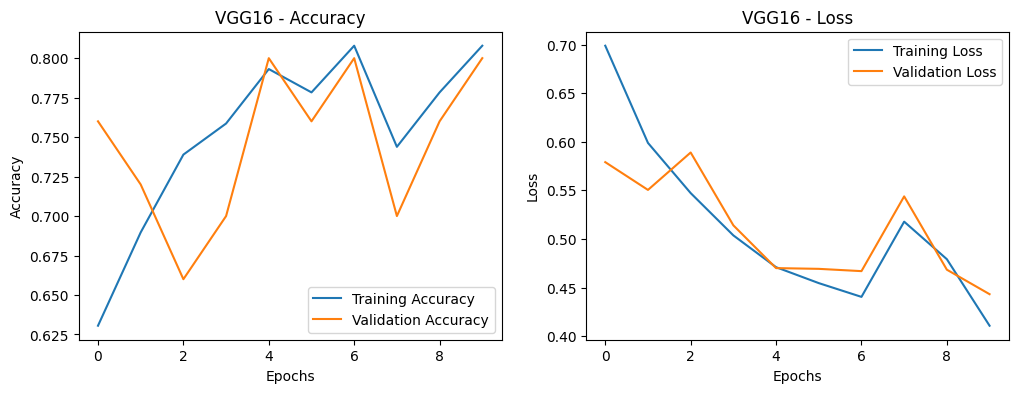

In [ ]:
# Plot Akurasi dan Loss
def plot_training(history, title):
    plt.figure(figsize=(12, 4))

    # Plot Akurasi
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Tampilkan hasil training
plot_training(history_vgg, "VGG16")


# Menampilkan Contoh Satu Gambar dari Setiap Kelas

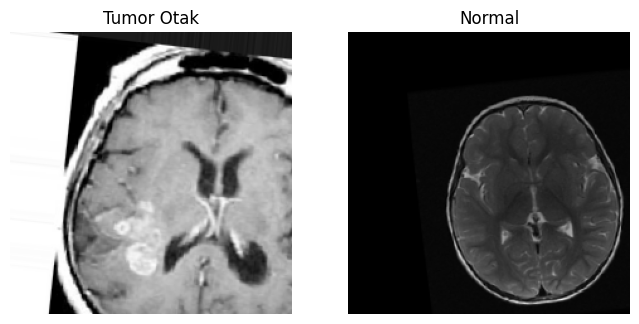

In [ ]:
import matplotlib.pyplot as plt

# Ambil satu batch gambar dari generator validasi
images, labels = next(validation_generator)

# Pilih satu gambar Tumor dan satu gambar Normal
tumor_idx = np.where(labels == 1)[0][0]  # Ambil indeks pertama dari label 1 (Tumor)
normal_idx = np.where(labels == 0)[0][0]  # Ambil indeks pertama dari label 0 (Normal)

# Plot kedua gambar
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].imshow(images[tumor_idx])
ax[0].set_title("Tumor Otak")
ax[0].axis("off")

ax[1].imshow(images[normal_idx])
ax[1].set_title("Normal")
ax[1].axis("off")

plt.show()


Fungsi di atas ngebantu buat nampilin grafik yang nunjukin perkembangan akurasi dan loss selama proses training model. Jadi, pertama-tama fungsi ini ngebuat dua plot dalam satu gambar: satu buat akurasi dan satu lagi buat loss. Di plot pertama, kita liat perbandingan antara akurasi data training dan validasi seiring bertambahnya epoch. Di plot kedua, kita liat perbandingan antara loss pada training dan validasi. Dengan gini, kita bisa evaluasi seberapa baik model VGG16 kita selama proses training, dan apakah modelnya overfitting atau underfitting berdasarkan grafik yang ditunjukin.

# Visualisasi Distribusi Data

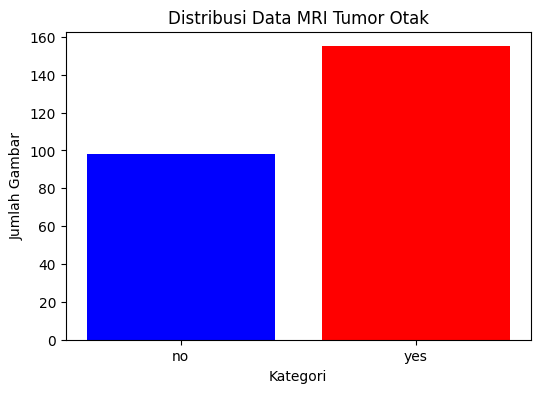

In [ ]:
import collections

# Mendapatkan jumlah gambar di setiap kelas
class_counts = train_generator.class_indices  # Mapping kelas ke indeks
class_counts = {k: len(os.listdir(os.path.join(dataset_path, k))) for k in class_counts.keys()}

# Visualisasi distribusi data
plt.figure(figsize=(6, 4))
plt.bar(class_counts.keys(), class_counts.values(), color=['blue', 'red'])
plt.xlabel("Kategori")
plt.ylabel("Jumlah Gambar")
plt.title("Distribusi Data MRI Tumor Otak")
plt.show()


Kode di atas digunakan untuk menghitung jumlah gambar di setiap kelas dari dataset MRI tumor otak yang ada di dalam folder. Pertama-tama, kode ini ngambil informasi tentang mapping antara kelas dan indeksnya dari `train_generator.class_indices`. Setelah itu, kode menghitung jumlah gambar di setiap folder kategori (kelas) dengan cara ngelihat jumlah file gambar yang ada di setiap folder kelas tersebut. Hasil perhitungan ini kemudian divisualisasikan dalam bentuk bar chart, dimana sumbu X menunjukkan kategori dan sumbu Y menunjukkan jumlah gambar di tiap kategori. Dengan ini, kita bisa lihat distribusi data antara kelas-kelas yang ada, apakah seimbang atau ada kelas yang lebih banyak datanya.

# Menampilkan Confussion Matrix

2/2 ━━━━━━━━━━━━━━━━━━━━ 36s 12s/step


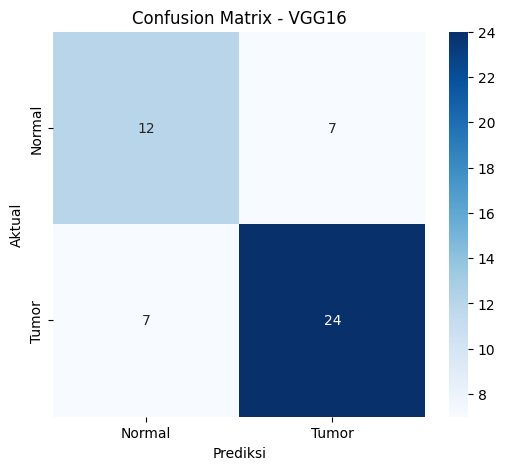

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Prediksi gambar validasi menggunakan model VGG16
y_true = validation_generator.classes  # Label asli
y_pred_vgg = (model_vgg.predict(validation_generator) > 0.5).astype("int32")  # Prediksi VGG16

# Buat Confusion Matrix untuk VGG16
cm_vgg = confusion_matrix(y_true, y_pred_vgg)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_vgg, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Tumor"], yticklabels=["Normal", "Tumor"])
plt.title("Confusion Matrix - VGG16")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()


Kode di atas digunakan untuk menghitung jumlah gambar di setiap kelas dari dataset MRI tumor otak yang ada di dalam folder. Pertama-tama, kode ini ngambil informasi tentang mapping antara kelas dan indeksnya dari `train_generator.class_indices`. Setelah itu, kode menghitung jumlah gambar di setiap folder kategori (kelas) dengan cara ngelihat jumlah file gambar yang ada di setiap folder kelas tersebut. Hasil perhitungan ini kemudian divisualisasikan dalam bentuk bar chart, dimana sumbu X menunjukkan kategori dan sumbu Y menunjukkan jumlah gambar di tiap kategori. Dengan ini, kita bisa lihat distribusi data antara kelas-kelas yang ada, apakah seimbang atau ada kelas yang lebih banyak datanya.

# Meningkatkan Data Augmentasi yang lebih Variatif

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,    # Naikkan rotasi untuk variasi lebih banyak
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,   # Tambahkan flipping vertikal
    fill_mode='nearest',
    validation_split=0.2

)

In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Load model VGG16 tanpa fully connected layer (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Ubah base_model menjadi model_vgg
model_vgg = Model(inputs=base_model.input, outputs=base_model.output)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Membuka fine-tuning untuk beberapa layer terakhir
for layer in model_vgg.layers[-4:]:  # Misalnya, buka 4 layer terakhir
    layer.trainable = True

# Compile ulang dengan learning rate yang lebih kecil
from tensorflow.keras.optimizers import Adam

model_vgg.compile(optimizer=Adam(learning_rate=0.0001),  # Kurangi learning rate
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


# Optimasi Hyperparametere

In [7]:
from tensorflow.keras.optimizers import Adam

model_vgg.compile(optimizer=Adam(learning_rate=0.0001),  # Ubah LR lebih kecil
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [10]:
from tensorflow.keras.optimizers import Adam

model_vgg.compile(optimizer=Adam(learning_rate=0.0001),  # Ubah LR lebih kecil
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [12]:
num_classes = 5  # Ganti dengan jumlah kelas yang sesuai


In [14]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Model

num_classes = 5  # Sesuaikan dengan dataset kamu

x = Flatten()(model_vgg.output)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)  # Output layer

model_vgg = Model(inputs=model_vgg.input, outputs=x)


In [15]:
from tensorflow.keras.optimizers import Adam

model_vgg.compile(optimizer=Adam(learning_rate=0.0001),  # Ubah LR lebih kecil
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [16]:
from tensorflow.keras.layers import Dropout, BatchNormalization, Dense, Flatten

x = Flatten()(model_vgg.output)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)  # Tambahkan Batch Normalization
x = Dropout(0.5)(x)          # Dropout untuk mengurangi overfitting
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)  # Output sesuai jumlah kelas

model_vgg = Model(inputs=model_vgg.input, outputs=x)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Gunakan split untuk data validasi
)

# Direktori dataset (sesuaikan dengan lokasi dataset kamu)
dataset_dir = "/content/drive/MyDrive/tugasPCD/brain_tumor_dataset"  # Ganti dengan path dataset

# Generator untuk training
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),  # Sesuaikan dengan input VGG16
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Ambil subset training
)

# Generator untuk validation
val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Ambil subset validasi
)


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [7]:
num_classes = 5  # Ganti dengan jumlah kelas dalam dataset


In [8]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

# Load model VGG16 tanpa fully connected layer (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Menambahkan layer baru di atas VGG16
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)  # Pastikan num_classes sudah dideklarasikan

# Definisikan model akhir
model_vgg = Model(inputs=base_model.input, outputs=x)

# Compile model
from tensorflow.keras.optimizers import Adam
model_vgg.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Cek ringkasan model
model_vgg.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,694,917 (105.65 MB)

 Trainable params: 27,693,893 (105.64 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [11]:
num_classes = len(train_generator.class_indices)  # Ambil jumlah kelas dari train_generator
print(f"Jumlah kelas dalam dataset: {num_classes}")


Jumlah kelas dalam dataset: 2


In [12]:
x = Dense(num_classes, activation='softmax')(x)  # Pastikan num_classes sudah sesuai


In [13]:
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Harus 'categorical' untuk num_classes > 2
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [15]:
num_classes = len(train_generator.class_indices)  # Ambil jumlah kelas dari train_generator
print(f"Jumlah kelas dalam dataset: {num_classes}")


Jumlah kelas dalam dataset: 2


In [16]:
x = Dense(num_classes, activation='softmax')(x)  # Pastikan num_classes sudah sesuai


In [18]:
x = Dense(1, activation='sigmoid')(x)  # Untuk binary classification


In [19]:
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Untuk 2 kelas
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Untuk 2 kelas
    subset='validation'
)


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
